### This notebook computes typical returns oven n days for NIFTY

N = number of days 

In [1]:
N = 4

In [2]:
import numpy as np
import pandas as pd

from scipy import stats

import datetime

import niftyutils
from niftyutils import load_nifty_data

import matplotlib.pyplot as plt
import mplfinance as fplt

In [3]:
start_date = datetime.datetime(2005,8,1)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [4]:
n_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(N) - 1)*100
n_days_returns = n_days_returns.dropna()

In [5]:
min_val = np.mean(n_days_returns) - 3*np.std(n_days_returns)
max_val = np.mean(n_days_returns) + 3*np.std(n_days_returns)
normal_n_days_returns = n_days_returns[n_days_returns.between(min_val,max_val)]

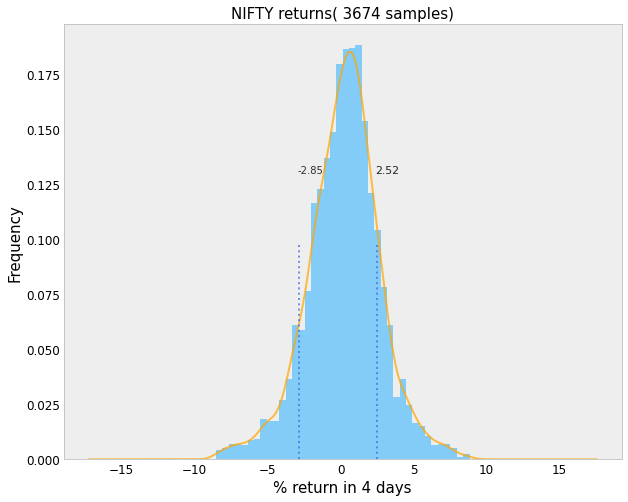

In [6]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(normal_n_days_returns, density = True, bins=40, color='#2ab0ff',alpha=0.55)
normal_n_days_returns.plot(kind = "kde", color='orange', alpha=0.7)

plt.xlabel('% return in {} days'.format(N), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)

quant_10, quant_85 = normal_n_days_returns.quantile(0.10), normal_n_days_returns.quantile(0.85)
quants = [[quant_10, 0.7, 0.5], [quant_85, 0.7, 0.5]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='royalblue')
    
plt.text(quant_10-.1, 0.13, '%.2f' % quant_10, size = 10, alpha = 0.8)
plt.text(quant_85-.13, 0.13, '%.2f' % quant_85, size = 11, alpha = 0.85)

plt.title('NIFTY returns( {} samples)'.format(len(normal_n_days_returns)),fontsize=15)
plt.grid(False)
plt.show()

### Is there any difference from Feb 17, 2019 - Date when NIFTY weekly options started

In [7]:
start_date = datetime.datetime(2019,2,11)
end_date = datetime.datetime(2020,8,29)
nifty_data = load_nifty_data(start_date,end_date)

In [8]:
n_days_returns = (nifty_data['Close']/nifty_data['Close'].shift(N) - 1)*100
n_days_returns = n_days_returns.dropna()

In [9]:
min_val = np.mean(n_days_returns) - 3*np.std(n_days_returns)
max_val = np.mean(n_days_returns) + 3*np.std(n_days_returns)
normal_n_days_returns = n_days_returns[n_days_returns.between(min_val,max_val)]

In [10]:
stats.shapiro(normal_n_days_returns)

ShapiroResult(statistic=0.9683102369308472, pvalue=3.8147362602103385e-07)

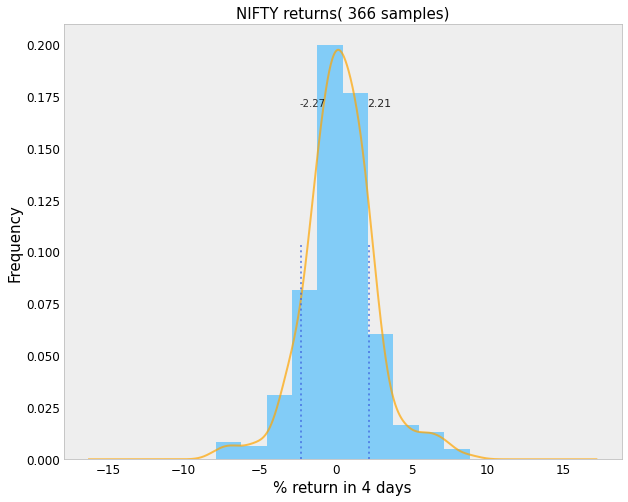

In [11]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(normal_n_days_returns, density = True, bins=10, color='#2ab0ff',alpha=0.55)
normal_n_days_returns.plot(kind = "kde", color='orange', alpha=0.7)

plt.xlabel('% return in {} days'.format(N), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)

quant_10, quant_85 = normal_n_days_returns.quantile(0.10), normal_n_days_returns.quantile(0.85)
quants = [[quant_10, 0.7, 0.5], [quant_85, 0.7, 0.5]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='royalblue')
    
plt.text(quant_10-.1, 0.17, '%.2f' % quant_10, size = 10, alpha = 0.8)
plt.text(quant_85-.13, 0.17, '%.2f' % quant_85, size = 11, alpha = 0.85)

plt.title('NIFTY returns( {} samples)'.format(len(normal_n_days_returns)),fontsize=15)
plt.grid(False)
plt.show()

In [12]:
n_days_returns_on_expiry = n_days_returns[n_days_returns.index.weekday==3]

In [13]:
min_val = np.mean(n_days_returns_on_expiry) - 3*np.std(n_days_returns_on_expiry)
max_val = np.mean(n_days_returns_on_expiry) + 3*np.std(n_days_returns_on_expiry)
normal_n_days_returns = n_days_returns_on_expiry[n_days_returns_on_expiry.between(min_val,max_val)]

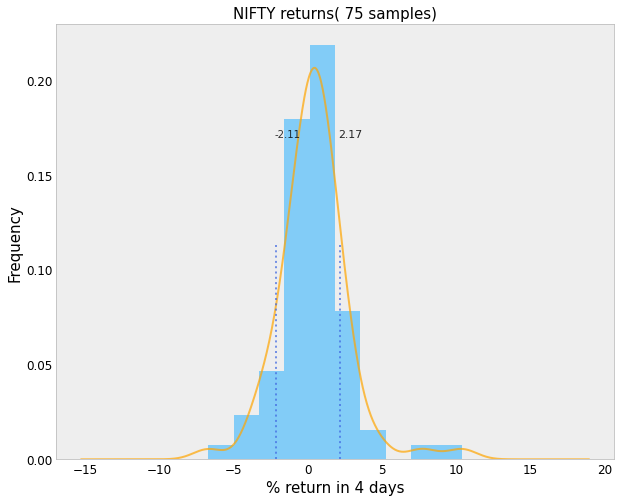

In [14]:
plt.figure(figsize=[10,8])
plt.style.use("bmh")

plt.hist(normal_n_days_returns, density = True, bins=10, color='#2ab0ff',alpha=0.55)
normal_n_days_returns.plot(kind = "kde", color='orange', alpha=0.7)

plt.xlabel('% return in {} days'.format(N), fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tick_params(left = False, bottom = False)

quant_10, quant_85 = normal_n_days_returns.quantile(0.10), normal_n_days_returns.quantile(0.85)
quants = [[quant_10, 0.7, 0.5], [quant_85, 0.7, 0.5]]

for i in quants:
    plt.axvline(i[0], alpha = i[1], ymax = i[2], linestyle = ":", color='royalblue')
    
plt.text(quant_10-.1, 0.17, '%.2f' % quant_10, size = 10, alpha = 0.8)
plt.text(quant_85-.13, 0.17, '%.2f' % quant_85, size = 11, alpha = 0.85)

plt.title('NIFTY returns( {} samples)'.format(len(normal_n_days_returns)),fontsize=15)
plt.grid(False)
plt.show()